#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin


In [3]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [4]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

mkdir: cannot create directory ‘LHCb_Data’: File exists


In [5]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [6]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [7]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

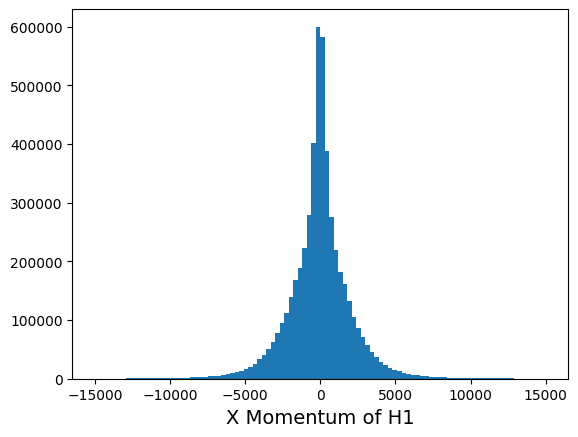

In [8]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

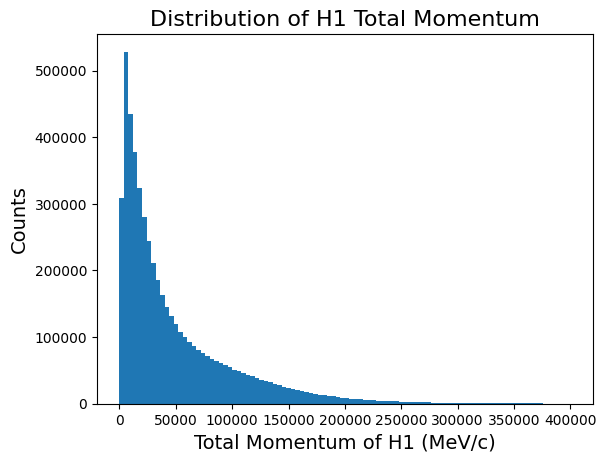

In [9]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array() #added
H1_PZ=Events['H1_PZ'].array() #added


# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2)) #added

# then here you can plot something (remember to adjust the range)
plt.figure()
plt.hist(H1_Ptot, bins=100, range=(0, 400000))  # Adjusted range
plt.xlabel('Total Momentum of H1 (MeV/c)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Distribution of H1 Total Momentum', fontsize=16)
plt.show()


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

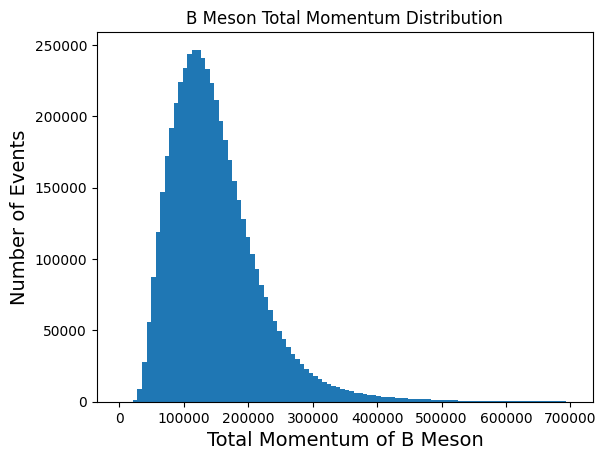

In [10]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

#extract momentum components for the second daughter particle
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()

#compute total momentum for te second daughter
H2_Ptot=np.sqrt((H2_PX**2)+(H2_PY**2)+(H2_PZ**2))

#extract momentum components for third daughter particle
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

#compute total momentum for the third daughter
H3_Ptot=np.sqrt((H3_PX**2)+(H3_PY**2)+(H3_PZ**2))

#momentum conservation: total momentum = the sum of daughter momenta
B_PX = H1_PX + H2_PX + H3_PX
B_PY = H1_PY + H2_PY + H3_PY
B_PZ = H1_PZ + H2_PZ + H3_PZ

#compute the total momentum of the mother particle
B_Ptot=np.sqrt((B_PX**2)+(B_PY**2)+(B_PZ**2))

#plot total momentum distribution of the mother particle
plt.figure()
plt.hist(B_Ptot, bins=100, range=(0, 700000))  
plt.xlabel('Total Momentum of B Meson', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.title('B Meson Total Momentum Distribution')
plt.show()

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [11]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items(): #added no of event
    print ("%s  :  %s"%(branch, value)) #print the branch name and its corresponding value 

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [12]:
def Energy (momentum, mass):
    #calculate the relativistic energy using E^2 = p^2 + m^2
    Energy_Kaon=np.sqrt((momentum**2)+(mass**2))
    return Energy_Kaon

mass_Kaon = 493 #mass of kaon, unit in MeVc/C^2  (source: https://www.sciencedirect.com/science/article/pii/0550321379900130)

#compute energy of each kaon using the total momentum and kaon mass
Energy_H1 = Energy(H1_Ptot, mass_Kaon)
Energy_H2 = Energy(H2_Ptot, mass_Kaon)
Energy_H3 = Energy(H3_Ptot, mass_Kaon)

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

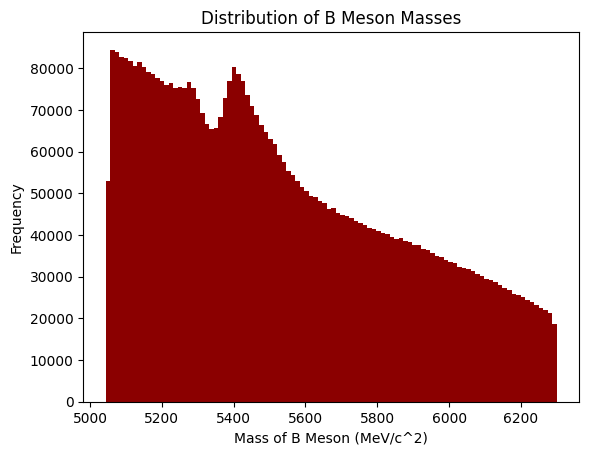

Mean of reconstructed B meson mass: 5535.57 MeV/c²


In [53]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
Momentum_B = B_Ptot   #total momentum of the B meson = sum of the daughters' momenta
Energy_B = Energy_H1 + Energy_H2 + Energy_H3   #total energy of the B meson = sum of the daughters' energies

#using relativstic energy-momentum relation: M^2 = E^2 - p^2
Mass_B = np.sqrt((Energy_B**2) - (Momentum_B**2))

#Now plot a histogram of the range of masses of the B meson.
plt.hist(Mass_B, bins=100, color='darkred')
plt.xlabel('Mass of B Meson (MeV/c^2)')
plt.ylabel('Frequency')
plt.title('Distribution of B Meson Masses')
plt.show()

#Does this match what we would expect from theory? 
print(f"Mean of reconstructed B meson mass: {np.mean(Mass_B):.2f} MeV/c²")
#Hint - look it up --> 5.279 GeV (source: https://www.oxfordreference.com/display/10.1093/oi/authority.20110803095514188)

.............................................................................................................................................................................................................................................................................................................................................................
Does this match what we would expect from theory?

--> The theoretical value for the B meson mass is around 5279 MeV/c^2. The observed mean mass is 5535.57 MeV/c^2, which is slightly higher than the theoretical value. This could be due to experimental uncertainties, statistical fluctuations, or limitations in the data analysis.
.............................................................................................................................................................................................................................................................................................................................................................

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

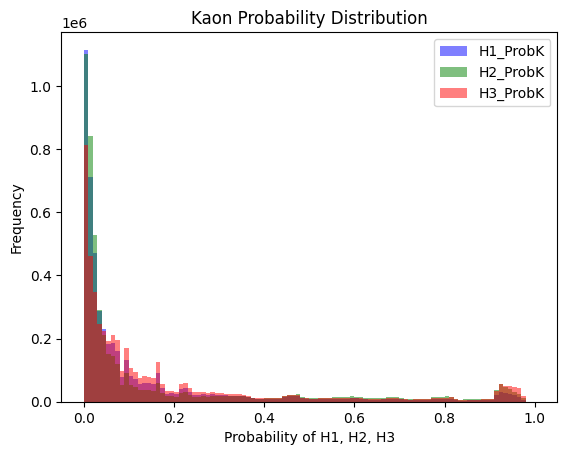

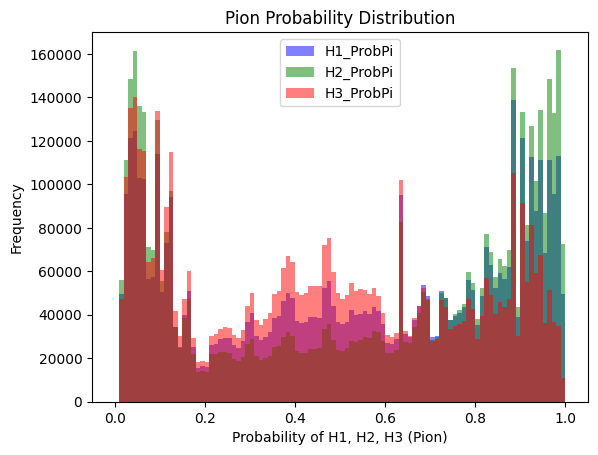

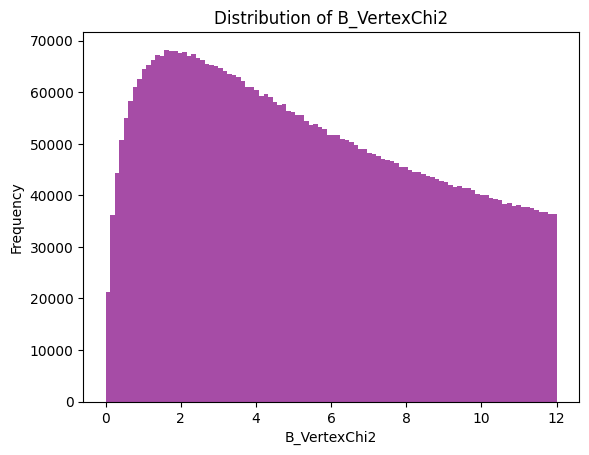

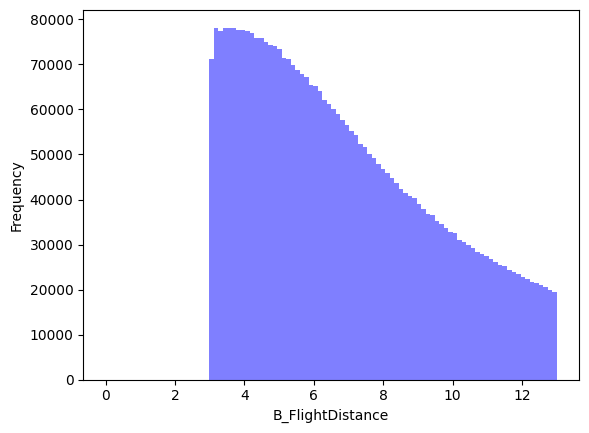

In [54]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(branches['H1_ProbK'], bins=100, range=(0,1), color='blue', alpha = 0.5, label='H1_ProbK')
plt.hist(branches['H2_ProbK'], bins=100, range=(0,1), color='green', alpha = 0.5, label='H2_ProbK')
plt.hist(branches['H3_ProbK'], bins=100, range=(0,1), color='red', alpha = 0.5, label='H3_ProbK')
#shows the probability distribution for each of the three particles (H1, H2, H3) being Kaons

plt.xlabel('Probability of H1, H2, H3')
plt.ylabel('Frequency')
plt.title('Kaon Probability Distribution')

plt.legend()
plt.show()


#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(branches['H1_ProbPi'], bins=100, range=(0,1), color='blue', alpha=0.5, label='H1_ProbPi')
plt.hist(branches['H2_ProbPi'], bins=100, range=(0,1), color='green', alpha=0.5, label='H2_ProbPi')
plt.hist(branches['H3_ProbPi'], bins=100, range=(0,1), color='red', alpha=0.5, label='H3_ProbPi')
#shows the probability distribution for each of the three particles (H1, H2, H3) being Pions

plt.xlabel('Probability of H1, H2, H3 (Pion)')
plt.ylabel('Frequency')
plt.title('Pion Probability Distribution')

plt.legend()
plt.show()


#For all our particles, make a plot of the B_VertexChi2
plt.hist(branches['B_VertexChi2'], bins=100, color='purple', alpha=0.7) #B_VertexChi2 gives the statistical quality of the reconstructed decay vertex


#labels and title
plt.xlabel('B_VertexChi2')
plt.ylabel('Frequency')
plt.title('Distribution of B_VertexChi2')

plt.show()


# Plot any other variables from the list above you think would be handy to use in a selection... --> chosen: flight distance
plt.hist(branches['B_FlightDistance'], bins=100, range=(0,13), color='blue', alpha = 0.5)
plt.xlabel('B_FlightDistance')
plt.ylabel('Frequency')
plt.show()

Using these plots, we can now think about making a preselection. This has some format like the below:

In [55]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)


#counting the initial number of events in the dataset
initial_no_events = len(branches)
print(f"Initial number of events: {initial_no_events}")

#selection criteria for events based on physical properties and particle identification
selection = (
    (branches['H1_ProbK'] > branches['H1_ProbPi']) & #accept H1 as a kaon if the kaon probability is greater than pion probability
    (branches['H2_ProbK'] > branches['H2_ProbPi']) & #          ''
    (branches['H3_ProbK'] > branches['H3_ProbPi']) & #          ''
    (branches['H1_isMuon'] != 1) & #reject H1 if it is a muon
    (branches['H2_isMuon'] != 1) & #         ''
    (branches['H3_isMuon'] != 1) & #         ''
    (branches['B_FlightDistance'] < 19) & #limit on the flight distance for B mesons to exclude outliers
    (branches['B_VertexChi2'] < 19) #limit the B meson vertex chi-squared value to filter poorly reconstructed events
)

#count number of selected events afer applying the selection criteria
total_events = len(branches_dictionary)
selected_data = branches[selection]
print(f"Number of selected events: {len(selected_data)}")

Initial number of events: 5135823
Number of selected events: 33939


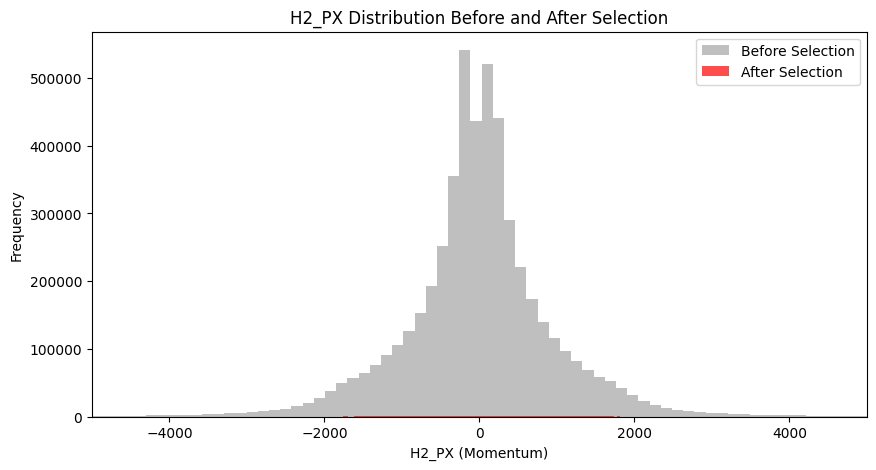

In [56]:
#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree = branches[selection] #adjusted

#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree


#Try plotting our H2_PX distribution with and without the selection and spot the differences...

#plot the H2_PX distribution before selection (using original data)
plt.figure(figsize=(10,5))
plt.hist(branches['H2_PX'], bins=500, color='gray', alpha=0.5, label='Before Selection')

#plot the H2_PX distribution after the selection (using the selected data)
plt.hist(CutTree['H2_PX'], bins=500, color='red', alpha=0.7, label='After Selection')

#set x axis
plt.xlim(-5000, 5000)

#labels and legend
plt.xlabel('H2_PX (Momentum)')
plt.ylabel('Frequency')
plt.title('H2_PX Distribution Before and After Selection')
plt.legend()

plt.show()

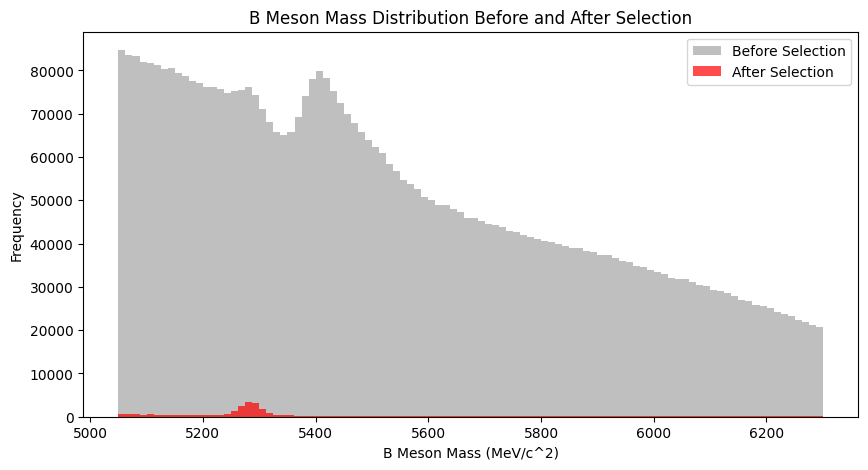

In [57]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

#define particle masses (assumed all three are kaons for now)
m_H1 = 493.7  # MeV/c^2 
m_H2 = 493.7  #   ''
m_H3 = 493.7  #   ''

#compute individual energies using the formula E = sqrt(p^2 + m^2)
E_H1 = np.sqrt(branches["H1_PX"]**2 + branches["H1_PY"]**2 + branches["H1_PZ"]**2 + m_H1**2)
E_H2 = np.sqrt(branches["H2_PX"]**2 + branches["H2_PY"]**2 + branches["H2_PZ"]**2 + m_H2**2)
E_H3 = np.sqrt(branches["H3_PX"]**2 + branches["H3_PY"]**2 + branches["H3_PZ"]**2 + m_H3**2)

#compute total energy
E_B = E_H1 + E_H2 + E_H3

#compute total momentum squared (P^2) by summing the squared momentum components for each daughter particle
P_B2 = (branches["H1_PX"] + branches["H2_PX"] + branches["H3_PX"])**2 + \
       (branches["H1_PY"] + branches["H2_PY"] + branches["H3_PY"])**2 + \
       (branches["H1_PZ"] + branches["H2_PZ"] + branches["H3_PZ"])**2

#compute B meson mass using the relativistic formula
B_mass = np.sqrt(E_B**2 - P_B2)

#apply cuts
B_mass_post = B_mass[selection]

#plot histogram/labels and legend
plt.figure(figsize=(10,5))
plt.hist(B_mass, bins=100, color="gray", alpha=0.5, label="Before Selection")
plt.hist(B_mass_post, bins=100, color="red", alpha=0.7, label="After Selection")

plt.xlabel("B Meson Mass (MeV/c^2)")
plt.ylabel("Frequency")
plt.title("B Meson Mass Distribution Before and After Selection")
plt.legend()
plt.show()


.............................................................................................................................................................................................................................................................................................................................................................      
In both plots the difference is very noticaeble, with the selected data being much narrower and concentrated. This suggests that the selection criteria are effectively filtering out a large portion of the original data, leaving only the events that meet the specified conditions
............................................................................................................................................................................................................................................................................................................................................................. 

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

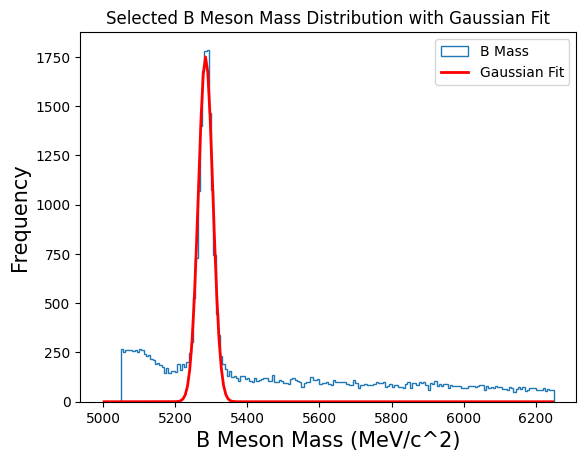

In [59]:
# Grab another package
from scipy.optimize import curve_fit

#define the Gaussian function or fitting (A is amplitude, mu is mean, sigma is standard deviation)
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

#the mass of the B meson after selection
B_Mass = B_mass_post

#create histogram and extract bin data
bin_height, bin_edge, _ = plt.hist(B_Mass, bins=200, range=(5000, 6250), label="B Mass", histtype='step')

#compute bin centers by averaging the bin edges
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2
y_data = bin_height

#adjust initial parameter estimates
A_initial = max(y_data) 
mu_initial = np.median(B_Mass) 
sigma_initial = np.std(B_Mass) 

#initial guess for the parameters
p0 = [A_initial, mu_initial, sigma_initial]

#perform Gaussian fit
optimisedParameters_gauss, pcov_gauss = curve_fit(gauss, x_data, y_data, p0=p0)

#generate fitted curve
y_fit_gauss = gauss(x_data, *optimisedParameters_gauss)

#overlay the fit on histogram
plt.plot(x_data, y_fit_gauss, label='Gaussian Fit', color='red', linewidth=2)
plt.xlabel("B Meson Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Selected B Meson Mass Distribution with Gaussian Fit")

plt.legend()
plt.show()

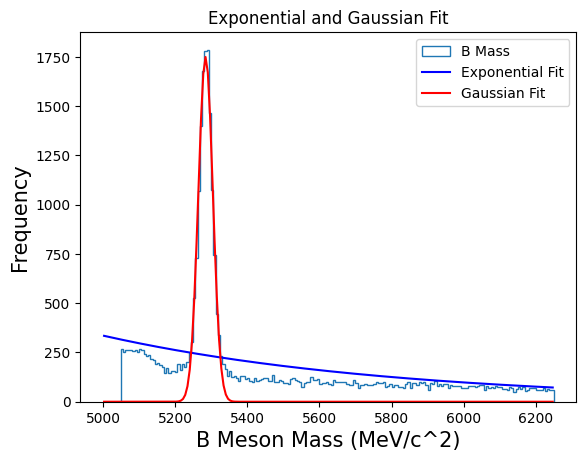

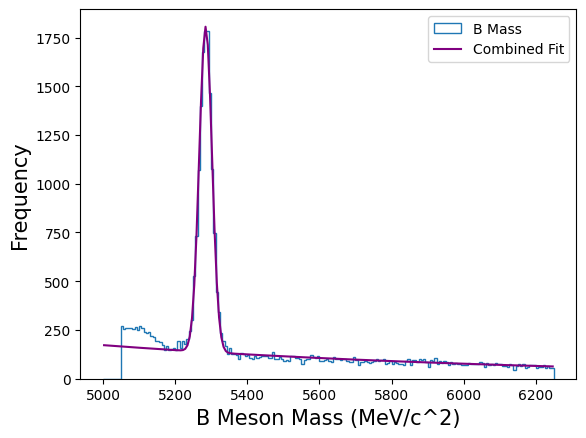

In [60]:
# Explore optimisedParameters - what does it contain? 
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...  

#defining the exponential background function
def exponential_bg(x, B, decay_rate):
    return B * np.exp(-decay_rate * x)

#combine  the Gaussian and exponential function for fitting
def gaussian_plus_exponential(x, A, mu, sigma, B, decay_rate):
    return gauss(x, A, mu, sigma) + exponential_bg(x, B, decay_rate)



#plotting Gaussian and exponential fits separately

#extracting histogram data for B meson mass distribution
bin_counts, bin_edges, _ = plt.hist(B_Mass, bins=200, range=(5000, 6250), label="B Mass", histtype='step')

#compute bin centers for fitting
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2
y_vals = bin_counts

#initial parameter guesses
A_guess = max(y_vals) #amplitude of Gaussian
mu_guess = np.mean(B_Mass) #mean of the Gaussian
sigma_guess = 313.5  #standard deviation
B_guess = max(y_vals) #amplitude of exponential
decay_guess = 5e-7 #decay rate

#fitting the exponential backround function
opt_params_exp, _ = curve_fit(exponential_bg, x_vals, y_vals, p0=[B_guess, decay_guess])
y_fit_exp = exponential_bg(x_vals, *opt_params_exp)

#plotting exponential andGaussian fits separately on the histogram
plt.plot(x_vals, y_fit_exp, label='Exponential Fit', color='blue')
plt.plot(x_vals, y_fit_gauss, label='Gaussian Fit', color='red')
plt.xlabel("B Meson Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Exponential and Gaussian Fit")
plt.legend()
plt.show()

#combined fit for Gaussian + Exponential
bin_counts, bin_edges, _ = plt.hist(B_Mass, bins=200, range=(5000, 6250), label="B Mass", histtype='step')

#recompute bin centers and values for the combined fit
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2
y_vals = bin_counts

#curve fitting for combined function
opt_params_combined, _ = curve_fit(gaussian_plus_exponential, x_vals, y_vals, p0=[A_guess, mu_guess, sigma_guess, B_guess, decay_guess])
y_fit_combined = gaussian_plus_exponential(x_vals, *opt_params_combined)

# Plotting result of the combined Gaussian + Exponential fit
plt.plot(x_vals, y_fit_combined, label='Combined Fit', color='purple')
plt.xlabel("B Meson Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.legend()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

Signal Yield: 11821.09 ± 272.50
Background Yield: 21683.91 ± 328.27
Reduced Chi-Squared for combined fit: 12.43
Reduced Chi-Squared for gaussian fit: 10340451565.63
Reduced Chi-Squared for exponential fit: 280.83


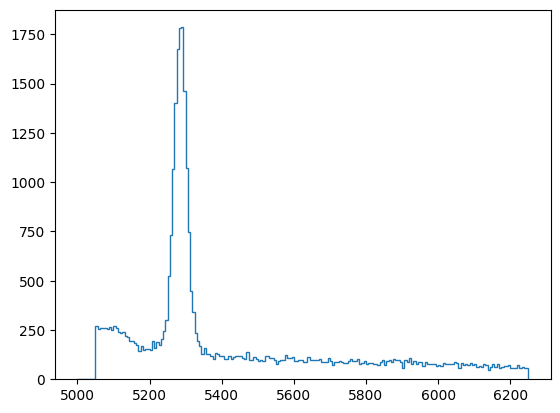

In [62]:
#define the Gaussian function for fitting
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2. * sigma ** 2))

#define the exponential background function
def exponential_bg(x, B, decay_rate):
    return B * np.exp(-decay_rate * x)

#combine Gaussian and exponential functions for fitting
def gaussian_plus_exponential(x, A, mu, sigma, B, decay_rate):
    return gauss(x, A, mu, sigma) + exponential_bg(x, B, decay_rate)

#data for B Meson
B_Mass = B_mass_post

#create histogram and extract bin data
bin_counts, bin_edges, _ = plt.hist(B_Mass, bins=200, range=(5000, 6250), label="B Mass", histtype='step')

#compute bin centers for fitting
x_vals = (bin_edges[:-1] + bin_edges[1:]) / 2
y_vals = bin_counts

#initial parameter guesses for Gaussian + Exponential fit
A_guess = max(y_vals)  #amplitude of Gaussian
mu_guess = np.mean(B_Mass)  #mean of the Gaussian
sigma_guess = 313.5  #standard deviation
B_guess = max(y_vals)  #amplitude of exponential
decay_guess = 5e-7  #decay rate

#perform curve fitting for the combined Gaussian + Exponential function
opt_params_combined, pcov_combined = curve_fit(
    gaussian_plus_exponential, x_vals, y_vals, 
    p0=[A_guess, mu_guess, sigma_guess, B_guess, decay_guess]
)

#extract covariance matrix from fit results
cov_matrix = np.diag(pcov_combined)
delta_A = np.sqrt(cov_matrix[0])  # Uncertainty in A
delta_sigma = np.sqrt(cov_matrix[2])  # Uncertainty in sigma

#define the formula for signal yield
def compute_signal_yield(A, sigma, mass_max, mass_min, num_bins):
    # Formula for calculating the integral of the Gaussian curve
    return (A * sigma * np.sqrt(2 * np.pi) / (mass_max - mass_min)) * num_bins

#define the formula for yield uncertainties
def compute_yield_uncertainty(delta_A, A, delta_sigma, sigma, signal_yield):
    # Compute the uncertainty in the signal yield using the propagated uncertainties in A and sigma
    return np.sqrt((delta_A / A) ** 2 + (delta_sigma / sigma) ** 2) * signal_yield

#define the chi-squared reduced computation
def compute_reduced_chi_squared(y_data, y_fit, params):
    epsilon = 1e-6  # Prevent division by zero
    chi_squared = np.sum(((y_data - y_fit) ** 2) / (y_fit + epsilon))
    degrees_of_freedom = len(y_data) - len(params)
    return chi_squared / degrees_of_freedom

#for the combined fit
#initialize parameters from the previous fit
A, mu, sigma, B, decay_rate = opt_params_combined

#set mass range for B meson and number of histogram bins
mass_min, mass_max = 5000, 6250
num_bins = 200

#compute total event count (sum of y-values in histogram)
total_event_count = np.sum(y_vals)
delta_total_event_count = np.sqrt(total_event_count)

#compute yield values for combined fit
signal_yield_val = compute_signal_yield(A, sigma, mass_max, mass_min, num_bins)
delta_signal_yield_val = compute_yield_uncertainty(delta_A, A, delta_sigma, sigma, signal_yield_val)

#compute background yield
background_yield_val = total_event_count - signal_yield_val
delta_background_yield_val = np.sqrt(delta_total_event_count**2 + delta_signal_yield_val**2)

#compute chi-squared values in different fits
chi_sq_gauss_exp = compute_reduced_chi_squared(y_vals, y_fit_combined, opt_params_combined)  #combined fit
chi_sq_gauss = compute_reduced_chi_squared(y_vals, y_fit_gauss, optimisedParameters_gauss)  #gaussian fit
chi_sq_exp = compute_reduced_chi_squared(y_vals, y_fit_exp, optimisedParameters_gauss)  #exponential fit

#results
print(f"Signal Yield: {signal_yield_val:.2f} ± {delta_signal_yield_val:.2f}")
print(f"Background Yield: {background_yield_val:.2f} ± {delta_background_yield_val:.2f}")
print(f"Reduced Chi-Squared for combined fit: {chi_sq_gauss_exp:.2f}")
print(f"Reduced Chi-Squared for gaussian fit: {chi_sq_gauss:.2f}")
print(f"Reduced Chi-Squared for exponential fit: {chi_sq_exp:.2f}")


.............................................................................................................................................................................................................................................................................................................................................................   
So how good was the fit, and how many events do you have?

--> The signal yield is 11821.09 ± 272.50, and the background yield is 21683.91 ± 328.27. The reduced chi-squared for the combined fit is 12.43, indicating a reasonable fit, although it's still somewhat high. The chi-squared values for the Gaussian and exponential fits are very large, suggesting they are not suitable alone. The combined fit provides the best model, but further refinement may be needed.
.............................................................................................................................................................................................................................................................................................................................................................

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

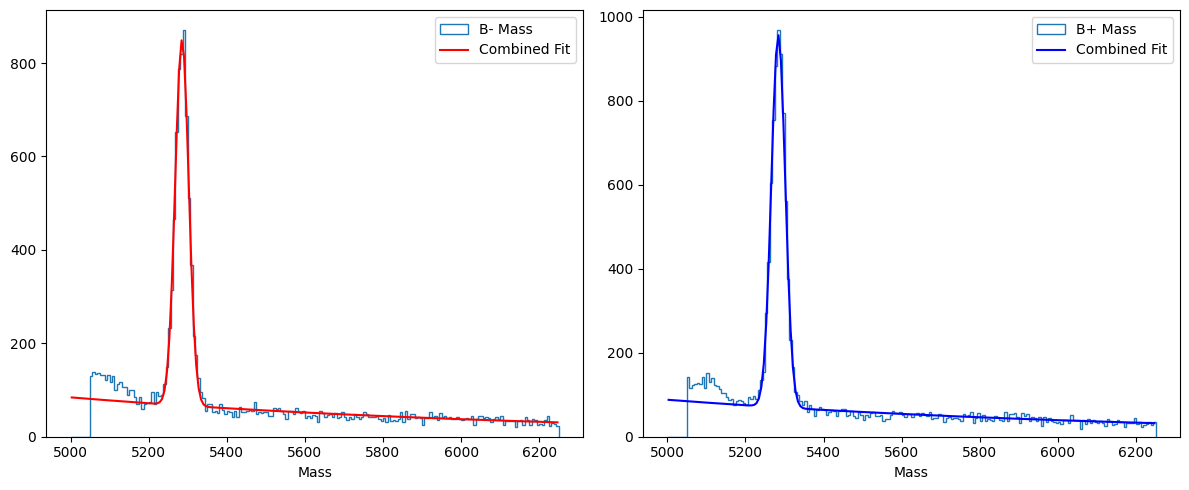

Yield of B-: 5481.420
Yield of B+: 6340.964
Asymmetry: -0.073 ± 0.009


In [63]:
#define constants
mass_kaons = 493.677  #in MeV/c^2
n_bins = 200  #number of bins
mass_min, mass_max = 5000, 6250  #mass range for histogram



#Functions

#function to calculate mass from energy and momentum
def mass(energy, momentum):
    return np.sqrt(energy**2 - momentum**2)

#function to calculate energy from momentum and mass
def energy(momentum, mass):
    return np.sqrt(momentum**2 + mass**2)

#combined Gaussian + Exponential function for fitting
def gauss_plus_exp(x, A, mu, sigma, B, lambda_):
    return (A * np.exp(-((x - mu)**2) / (2 * sigma**2))) + (B * np.exp(-lambda_ * x))

#function to compute the signal yield for B meson events
def signal_yield_(A, sigma, mass_max, mass_min, n_bins):
    return (A * sigma * np.sqrt(2 * np.pi) / (mass_max - mass_min)) * n_bins

#function to compute the uncertainty in signal yield
def delta_yield(delta_A, A, delta_sigma, sigma, signal_yield):
    return np.sqrt((delta_A / A) ** 2 + (delta_sigma / sigma) ** 2) * signal_yield

#selection criteria for B- and B+ events based on charge combinations
selection_b_minus = ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == -1)) | \
                   ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) | \
                   ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1))

selection_b_plus = ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == -1)) | \
                  ((CutTree['H1_Charge'] == -1) & (CutTree['H2_Charge'] == 1) & (CutTree['H3_Charge'] == 1)) | \
                  ((CutTree['H1_Charge'] == 1) & (CutTree['H2_Charge'] == -1) & (CutTree['H3_Charge'] == 1))

#apply selection to split events into B- and B+ data sets
Tree_b_minus, Tree_b_plus = CutTree[selection_b_minus], CutTree[selection_b_plus]

#function to compute the mass of the B meson from the momentum and energy of its deecay products
def compute_mass_momentum(Tree):
    #compute the total momentum of the B meson from the 3 daughter
    B_x, B_y, B_z = Tree['H1_PX'] + Tree['H2_PX'] + Tree['H3_PX'], Tree['H1_PY'] + Tree['H2_PY'] + Tree['H3_PY'], Tree['H1_PZ'] + Tree['H2_PZ'] + Tree['H3_PZ']
    B_momentum = np.sqrt(B_x**2 + B_y**2 + B_z**2)
    
    #compute the energy of each kaon from its momentum
    H_Ptot = [np.sqrt(Tree[f'H{i}_PX']**2 + Tree[f'H{i}_PY']**2 + Tree[f'H{i}_PZ']**2) for i in range(1, 4)]
    H_E = [energy(Ptot, mass_kaons) for Ptot in H_Ptot]
    
    #compute the total energy of the B meson
    B_energy = sum(H_E)
    
    #return the computed mass of the B meson
    return mass(B_energy, B_momentum)

#compute the masses for B- and B+ events
B_mass_minus, B_mass_plus = compute_mass_momentum(Tree_b_minus), compute_mass_momentum(Tree_b_plus)

#create a plot with two subplots for B- and B+ mass distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#function to plot the mass distribution with the combined Gaussian + Exponential fit
def plot_mass(ax, B_mass, title, color):
    bin_height, bin_edge, _ = ax.hist(B_mass, bins=n_bins, range=(mass_min, mass_max), label=title, histtype='step')
    x_data, y_data = (bin_edge[:-1] + bin_edge[1:]) / 2, bin_height
    
    #initial parameter guesses for the fit
    A_init, mu_init, sigma_init = max(y_data), np.mean(B_mass), np.std(B_mass) *1.2
    B_init, lambda_ = max(y_data), 0.0000005
    
    #perform curve fitting using the Gaussian + Exponential function
    optim_params, pcov = curve_fit(gauss_plus_exp, x_data, y_data, p0=[A_init, mu_init, sigma_init, B_init, lambda_])
    
    #calculate the fitted curve
    y_fit = gauss_plus_exp(x_data, *optim_params)
    
    #lot the fitted curve
    ax.plot(x_data, y_fit, label='Combined Fit', color=color)
    ax.set_xlabel("Mass")
    ax.legend()
    return optim_params, pcov

#plot the mass distributions for B- and B+ events and get fitting parameters
params_B_minus, pcov_B_minus = plot_mass(axes[0], B_mass_minus, "B- Mass", 'red')
params_B_plus, pcov_B_plus = plot_mass(axes[1], B_mass_plus, "B+ Mass", 'blue')

#adjust layout and display the plot
plt.tight_layout()
plt.show()

#extract uncertainties from the covariance matrices
covariances_B_minus, covariances_B_plus = np.diag(pcov_B_minus), np.diag(pcov_B_plus)
delta_A_B_minus, delta_sigma_B_minus = np.sqrt(covariances_B_minus[0]), np.sqrt(covariances_B_minus[2])
delta_A_B_plus, delta_sigma_B_plus = np.sqrt(covariances_B_plus[0]), np.sqrt(covariances_B_plus[2])

#compute the signal yields and uncertainties for B- and B+ events
signal_yield_B_minus = signal_yield_(params_B_minus[0], params_B_minus[2], mass_max, mass_min, n_bins)
delta_signal_yield_B_minus = delta_yield(delta_A_B_minus, params_B_minus[0], delta_sigma_B_minus, params_B_minus[2], signal_yield_B_minus)

signal_yield_B_plus = signal_yield_(params_B_plus[0], params_B_plus[2], mass_max, mass_min, n_bins)
delta_signal_yield_B_plus = delta_yield(delta_A_B_plus, params_B_plus[0], delta_sigma_B_plus, params_B_plus[2], signal_yield_B_plus)

#calculate the asymmetry between B+ and B- events with uncertainty
A_final = (signal_yield_B_minus - signal_yield_B_plus) / (signal_yield_B_minus + signal_yield_B_plus)

#ensure the denominator is non-zero and clamp A_final within a safe range
if (signal_yield_B_minus + signal_yield_B_plus) > 0:
    A_final = np.clip(A_final, -0.99, 0.99)  #clamp A_final to avoid issues
    sigma_A = np.sqrt((1 - A_final**2) / (signal_yield_B_minus + signal_yield_B_plus))
else:
    sigma_A = float('nan')  #assign NaN if the denominator is zero

#results
print(f"Yield of B-: {signal_yield_B_minus:.3f}")
print(f"Yield of B+: {signal_yield_B_plus:.3f}")
print(f"Asymmetry: {A_final:.3f} ± {sigma_A:.3f}")


.............................................................................................................................................................................................................................................................................................................................................................         
B- and B+ Yields:
The yields show a slight difference, with more B+ mesons than B- mesons. This is expected, but the difference could also be influenced by experimental biases or detector inefficiencies.

Asymmetry:
The asymmetry value of -0.073 indicates a small excess of B+ mesons, with a low uncertainty. This is likely due to detector effects (e.g., one side of the detector being more sensitive to B+ mesons), rather than a fundamental particle physics discovery like CP violation.
.............................................................................................................................................................................................................................................................................................................................................................

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [48]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [49]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [50]:
#Make the revised Dalitz plot here for only B+ mesons

In [51]:
#Make the revised Dalitz plot here for only B- mesons

In [52]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)